<a href="https://colab.research.google.com/github/MaryamNourii/Knowledge-Tracing_Recommendation-system-/blob/main/EdNet_KT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

import numpy as np
import pandas as pd
import os

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

In [ ]:
pip install --upgrade "kaleido==0.1.*"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 MB 21.6 MB/s eta 0:00:00


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/AI/Recommendation_system/KT1

/content/drive/MyDrive/AI/Recommendation_system/KT1


In [ ]:
!unzip -qx EdNet-KT1.zip -d KT1

In [ ]:
print(path)

/content/drive/MyDrive/AI/Recommendation_system/KT1/KT1


In [ ]:
path=r'/content/drive/MyDrive/AI/Recommendation_system/KT1/KT1'
d=[]
table_list=[]
s=pd.Series(os.listdir(path))
file_selected=s.sample(5000).to_numpy()
for file_name in file_selected:
    data_raw=pd.read_csv(path+'/'+file_name,encoding = "ISO-8859-15")
    data_raw['user_id']=pd.Series([file_name[:-4]]*len(data_raw))
    d.append([file_name[:-4],len(data_raw)])
    data=pd.DataFrame(data_raw,columns=['user_id']+data_raw.columns.to_list()[:-1])
    table_list.append(data)
df=pd.concat(table_list)
pd.set_option('display.max_rows',10)
df=df.reset_index(drop=True)
df

In [ ]:
df.describe()

,timestamp,solving_id,elapsed_time
count,6.142950e+05,614295.000000,6.142950e+05
mean,1.546290e+12,761.119609,2.586584e+04
std,1.984066e+10,1026.748363,4.310135e+04
min,1.493278e+12,1.000000,0.000000e+00
25%,1.531436e+12,88.000000,1.600000e+04
50%,1.548766e+12,363.000000,2.166700e+04
75%,1.564148e+12,1019.000000,3.000000e+04
max,1.575306e+12,7931.000000,2.409700e+07


In [ ]:
len(df.question_id.unique())

11903

In [ ]:
print(df.isnull().sum() / len(df))

user_id         0.000000
timestamp       0.000000
solving_id      0.000000
question_id     0.000000
user_answer     0.000374
elapsed_time    0.000000
dtype: float64


In [ ]:
df.fillna('not choose',inplace=True)

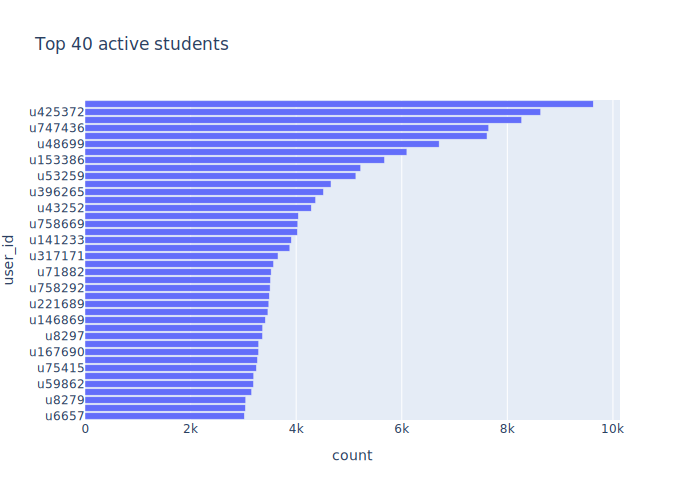

In [ ]:
user_count_table=pd.DataFrame(d,columns=['user_id','count'])
ds=user_count_table.sort_values(by=['count'],axis=0).tail(40)
fig = px.bar(
    ds,
    x = 'count',
    y = 'user_id',
    orientation='h',
    title='Top 40 active students'
)

fig.show("svg")

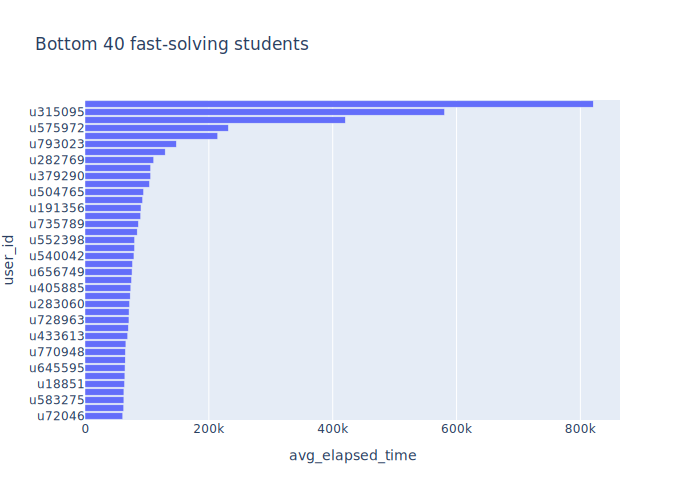

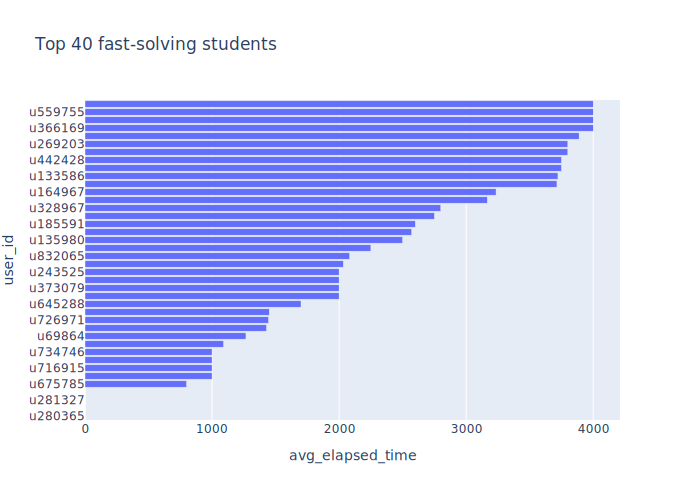

In [ ]:
ds=df.loc[:,['user_id','elapsed_time']].groupby('user_id').mean()
ds=ds.reset_index(drop=False)
ds.columns=['user_id','avg_elapsed_time']
ds_tail=ds.sort_values(by=['avg_elapsed_time'],axis=0).tail(40)

fig_tail = px.bar(
    ds_tail,
    x = 'avg_elapsed_time',
    y = 'user_id',
    orientation='h',
    title='Bottom 40 fast-solving students '
)
fig_tail.show("svg")
ds_head=ds.sort_values(by=['avg_elapsed_time'],axis=0).head(40)
fig_head = px.bar(
    ds_head,
    x = 'avg_elapsed_time',
    y = 'user_id',
    orientation='h',
    title='Top 40 fast-solving students'
)
fig_head.show("svg")

In [ ]:
bound=5000 # If the average time of doing the topic is less than 5000, it means that the student is most likely to be bad
ds=df.loc[:,['user_id','elapsed_time']].groupby('user_id').mean()
ds=ds.reset_index(drop=False)
ds.columns=['user_id','avg_elapsed_time']
bad_user_ids=ds[ds['avg_elapsed_time']<bound]['user_id'].to_list()
df_drop=df.drop(df[df['user_id'].isin(bad_user_ids)].index)
print('bad students number is ',len(bad_user_ids))
print('length of table after dropping is ',len(df_drop))

bad students number is  52
length of table after dropping is  613714


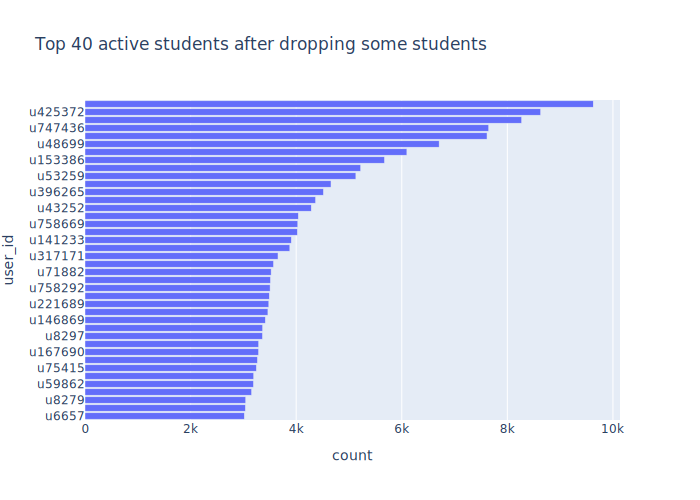

In [ ]:
ds=df_drop['user_id'].value_counts().reset_index(drop=False)
ds.columns=['user_id','count']
ds_tail=ds.sort_values(by=['count'],axis=0).tail(40)
fig_tail = px.bar(
    ds_tail,
    x = 'count',
    y = 'user_id',
    orientation='h',
    title='Top 40 active students after dropping some students'
)
fig_tail.show("svg")

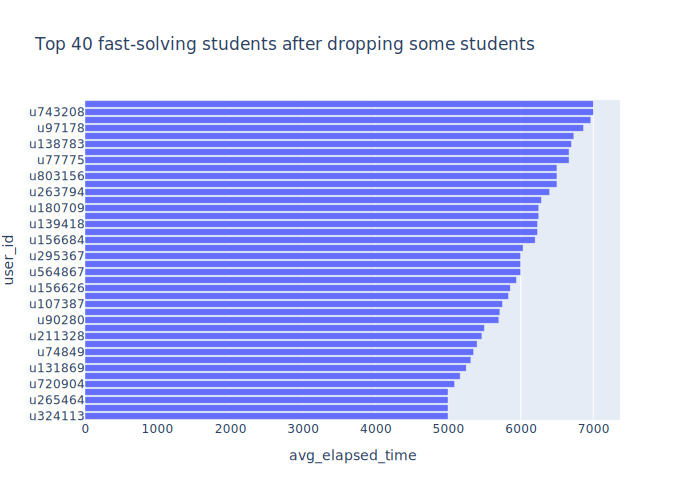

In [ ]:
ds=df_drop.loc[:,['user_id','elapsed_time']].groupby('user_id').mean()
ds=ds.reset_index(drop=False)
ds.columns=['user_id','avg_elapsed_time']

ds_head=ds.sort_values(by=['avg_elapsed_time'],axis=0).head(40)
fig_head = px.bar(
    ds_head,
    x = 'avg_elapsed_time',
    y = 'user_id',
    orientation='h',
    title='Top 40 fast-solving students after dropping some students'
)
fig_head.show("svg")

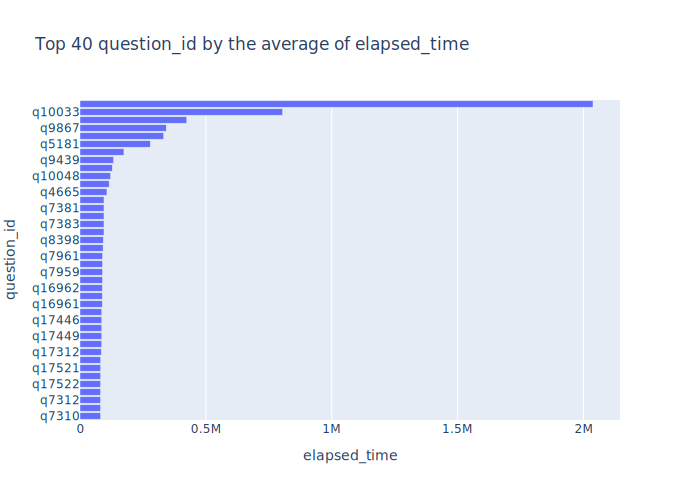

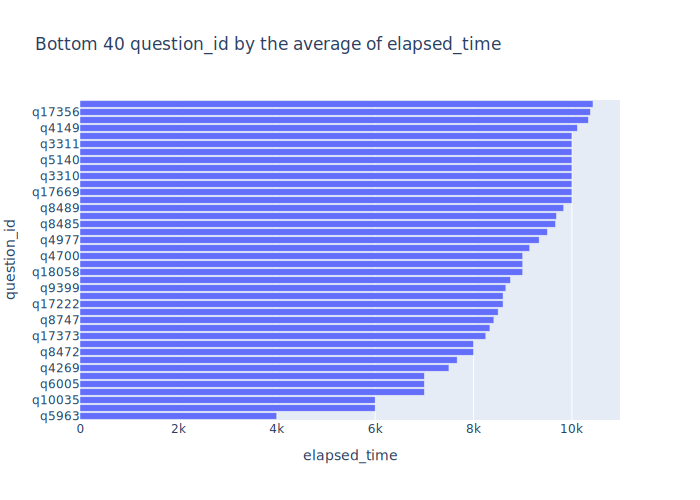

In [ ]:
ds=df.loc[:,['question_id','elapsed_time']].groupby('question_id').mean()
ds=ds.reset_index(drop=False)
ds_tail=ds.sort_values(by=['elapsed_time'],axis=0).tail(40)
fig_tail = px.bar(
    ds_tail,
    x = 'elapsed_time',
    y = 'question_id',
    orientation='h',
    title='Top 40 question_id by the average of elapsed_time'
)
fig_tail.show("svg")
ds_head=ds.sort_values(by=['elapsed_time'],axis=0).head(40)
fig_head = px.bar(
    ds_head,
    x = 'elapsed_time',
    y = 'question_id',
    orientation='h',
    title='Bottom 40 question_id by the average of elapsed_time'
)
fig_head.show("svg")

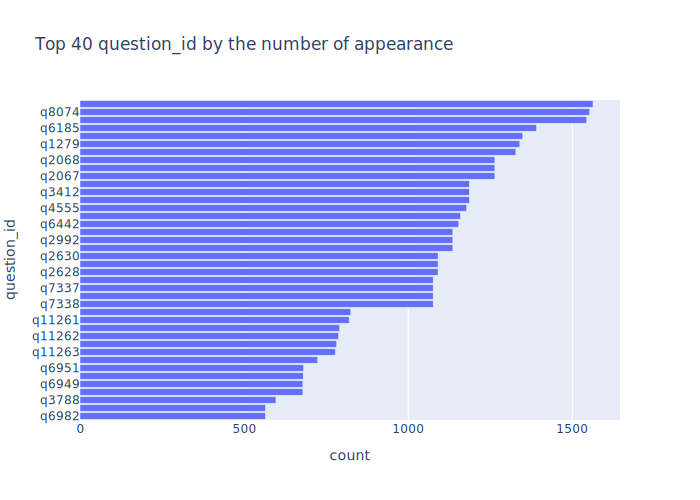

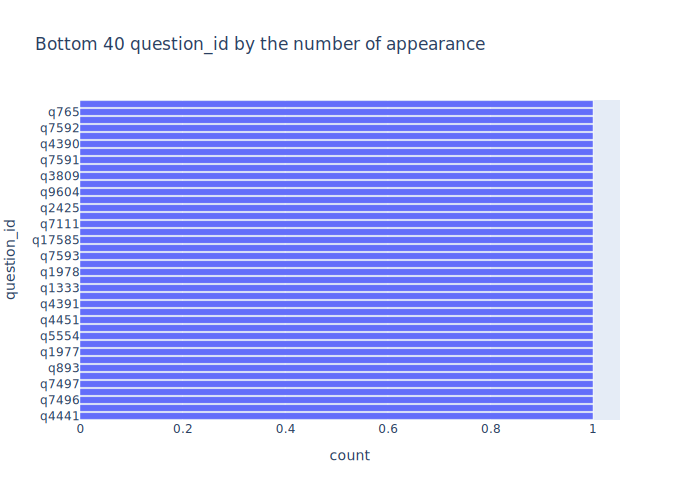

In [ ]:
ds=df['question_id'].value_counts().reset_index(drop=False)
ds.columns=['question_id','count']
ds_tail=ds.sort_values(by=['count'],axis=0).tail(40)
fig_tail = px.bar(
    ds_tail,
    x = 'count',
    y = 'question_id',
    orientation='h',
    title='Top 40 question_id by the number of appearance'
)
fig_tail.show("svg")
ds_head=ds.sort_values(by=['count'],axis=0).head(40)
fig_head = px.bar(
    ds_head,
    x = 'count',
    y = 'question_id',
    orientation='h',
    title='Bottom 40 question_id by the number of appearance'
)
fig_head.show("svg")

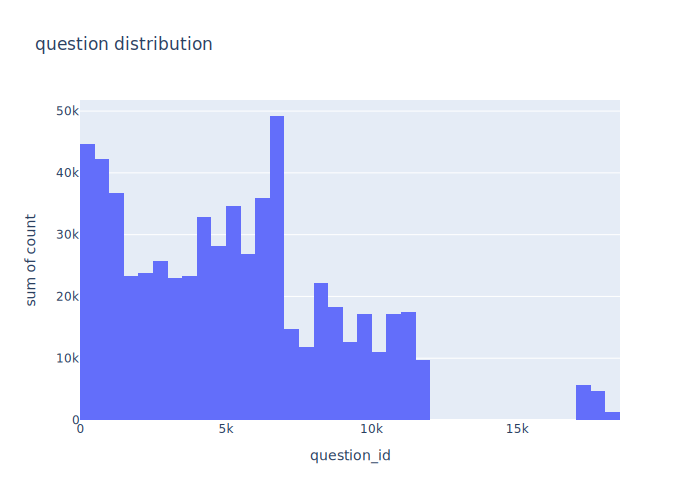

In [ ]:
ds2=df['question_id'].value_counts().reset_index(drop=False)
ds2.columns=['question_id','count']
def convert_id2int(x):
    return pd.Series(map(lambda t:int(t[1:]),x))  
ds2['question_id']=convert_id2int(ds2['question_id'])
ds2.sort_values(by=['question_id'])
fig = px.histogram(
    ds2,
    x = 'question_id',
    y = 'count',
    title='question distribution'
)
fig.show("svg")

In [ ]:
ds=df.loc[:,['question_id','user_answer','user_id']].groupby(['question_id','user_answer']).count()

most_count_dict={}
for id in df.question_id.unique():
    most_count=ds.loc[id].apply(lambda x:x.max())[0]
    most_count_dict[id]=most_count
ds2=ds.apply(lambda x:x-most_count_dict[x.name[0]],axis=1)
ds2=ds2[ds2.user_id==0]
ds2=ds2.reset_index(drop=False).loc[:,['question_id','user_answer']]
ds2.columns=['question_id','most_answer']
ds2.index=ds2['question_id']
ds2['most_answer']

question_id
q1        b
q10       d
q100      c
q1000     c
q10000    b
         ..
q9995     d
q9996     a
q9997     d
q9998     a
q9999     b
Name: most_answer, Length: 12122, dtype: object

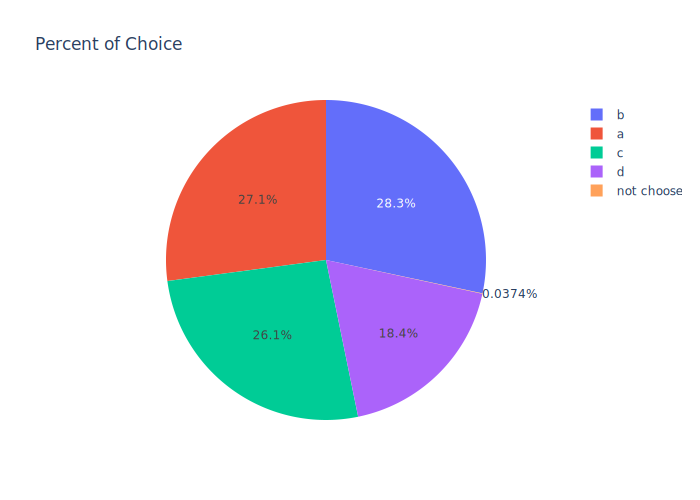

In [ ]:
ds = df['user_answer'].value_counts().reset_index(drop=False)
ds.columns = ['user_answer', 'percent']

ds['percent']=ds['percent']/len(df)
ds = ds.sort_values(by=['percent'])

fig = px.pie(
    ds,
    names = ds['user_answer'],
    values = 'percent',
    title = 'Percent of Choice'    
)

fig.show("svg")

In [ ]:
ds_time_question=df_time.loc[:,['time','question_id']]
ds_time_question=ds_time_question.sort_values(by=['time'])
ds_time_question

In [ ]:
ds_time_question['year']=pd.Series(map(lambda x :x.year,ds_time_question['time']))
ds_time_question['month']=pd.Series(map(lambda x :x.month,ds_time_question['time']))
ds=ds_time_question.loc[:,['year','month']].value_counts()

years=ds_time_question['year'].unique()
years.sort()
fig=make_subplots(
    rows=2,
    cols=2,
    start_cell='top-left',
    subplot_titles=tuple(map(str,years))
)
traces=[
    go.Bar(
        x=ds[year].reset_index().sort_values(by=['month'],axis=0)['month'].to_list(),
        y=ds[year].reset_index().sort_values(by=['month'],axis=0)[0].to_list(),
        name='Year: '+str(year),
        text=[ds[year][month] for month in ds[year].reset_index().sort_values(by=['month'],axis=0)['month'].to_list()],
        textposition='auto'
    ) for year in years
]
for i in range(len(traces)):
    fig.append_trace(traces[i],(i//2)+1,(i%2)+1)

fig.update_layout(title_text='Bar of the distribution of the number of question solved in {} years'.format(len(traces)))
fig.show('svg')

In [ ]:
ds_time_user=df_time.loc[:,['user_id','time']]
ds_time_user=ds_time_user.sort_values(by=['time'])
ds_time_user